## Marketing Problem

#### Understanding the problem statement and business case 

- Marketing is crucial for the growth and sustainablity of any business.Marketers can help build companies brand, engage customers, grow revenue and increase sales.


- One of the key pain pain points for marketers is to know their customers and identify their needs.


- In the marketing department we are trying to perform some customer market segmentations


- In order for marketers to launch an Targetting campaign we need to understand the customers. To understand the spending habbits of the customers.


- The aim is to cluster the customers into groups and categories in order to launch a targeted marketing campaign


- The Aim is to apply data science on the data provided by the bank and divide customers into atleast 3 distingtive groupes.  

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [3]:
# Code to display all the columns in the dataset
pd.set_option('display.max_columns', None)

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [5]:
df = pd.read_csv("Marketing_data.csv")

In [6]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Datframe info
- CUSTID: Identification of Credit Card holder 

- BALANCE: Balance amount left in customer's account to make purchases

- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

- PURCHASES: Amount of purchases made from account

- ONEOFFPURCHASES: Maximum purchase amount done in one-go

- INSTALLMENTS_PURCHASES: Amount of purchase done in installment

- CASH_ADVANCE: Cash in advance given by the user

- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid

- CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"

- PURCHASES_TRX: Number of purchase transactions made

- CREDIT_LIMIT: Limit of Credit Card for user

- PAYMENTS: Amount of Payment done by user

- MINIMUM_PAYMENTS: Minimum amount of payments made by user  

- PRC_FULL_PAYMENT: Percent of full payment paid by user

- TENURE: Tenure of credit card service for user

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Problem Type

- Unsupervised learning algorithm

- Create atleast 3 or more than 3 clusters of customer type

In [8]:
# Checking the datatypes
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [9]:
#Lets check for duplicate values
df.duplicated().sum()

0

In [10]:
# Lets check for missing values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Some missing values in the dataset

In [11]:
# Checking data shape
df.shape

(8950, 18)

In [12]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
# Checking the mean of all the variables
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Mean balance is ~ 1564 $

Balance frequency is ~ 88%

Max purchases are aboutt 49039.57 $

one of purchase average is ~ 600$

On an average the customers are taking upto 1000$ cash advance

In [14]:
df.shape

(8950, 18)

In [15]:
df[df["PURCHASES"] == 49039.57]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [16]:
df[df["CASH_ADVANCE"] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## EDA

<AxesSubplot:>

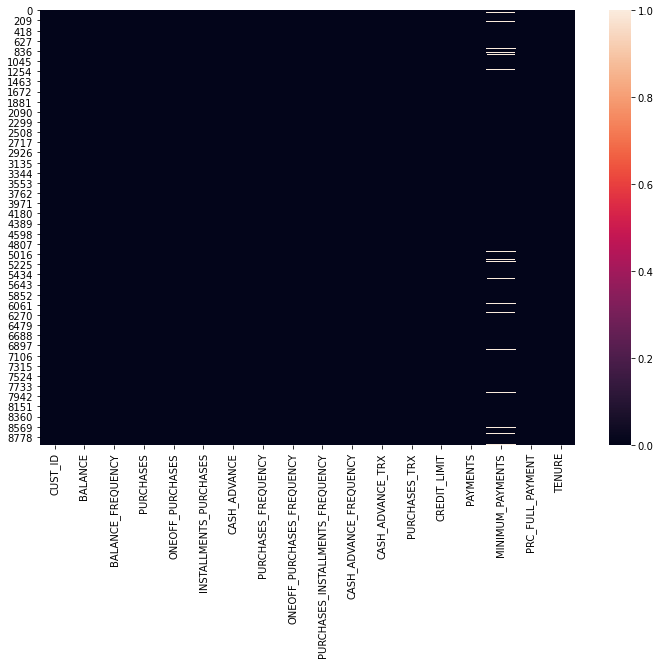

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

In [18]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [19]:
df["CREDIT_LIMIT"] = df['CREDIT_LIMIT'].fillna(4494.449450364621)

In [20]:
df['CREDIT_LIMIT'].isnull().sum()

0

In [21]:
df["MINIMUM_PAYMENTS"] = df['MINIMUM_PAYMENTS'].fillna(864.2065423050814)

In [22]:
df["MINIMUM_PAYMENTS"].isnull().sum()

0

In [23]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:>

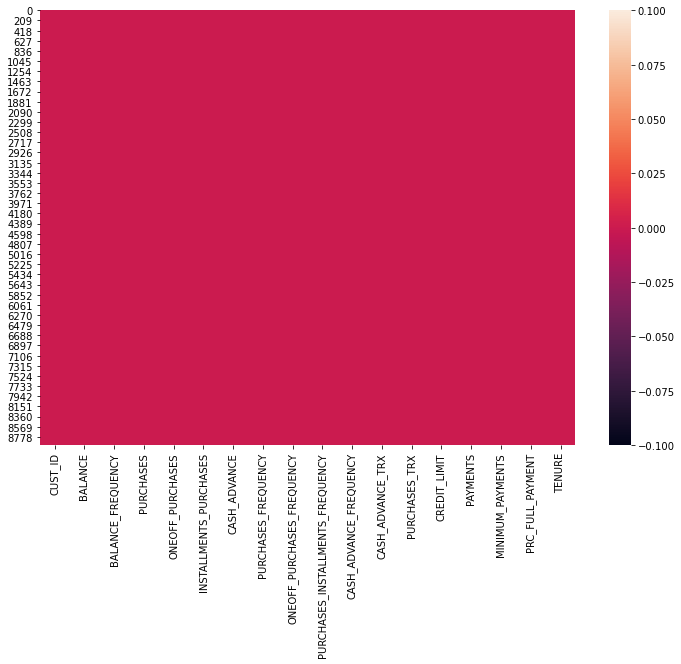

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

In [25]:
# Dropping the "CUST_ID" column
df = df.drop("CUST_ID",axis=1)

In [26]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [27]:
df.duplicated().sum()

0

In [28]:
# No duplicated values

In [29]:
len(df.columns)

17

In [30]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

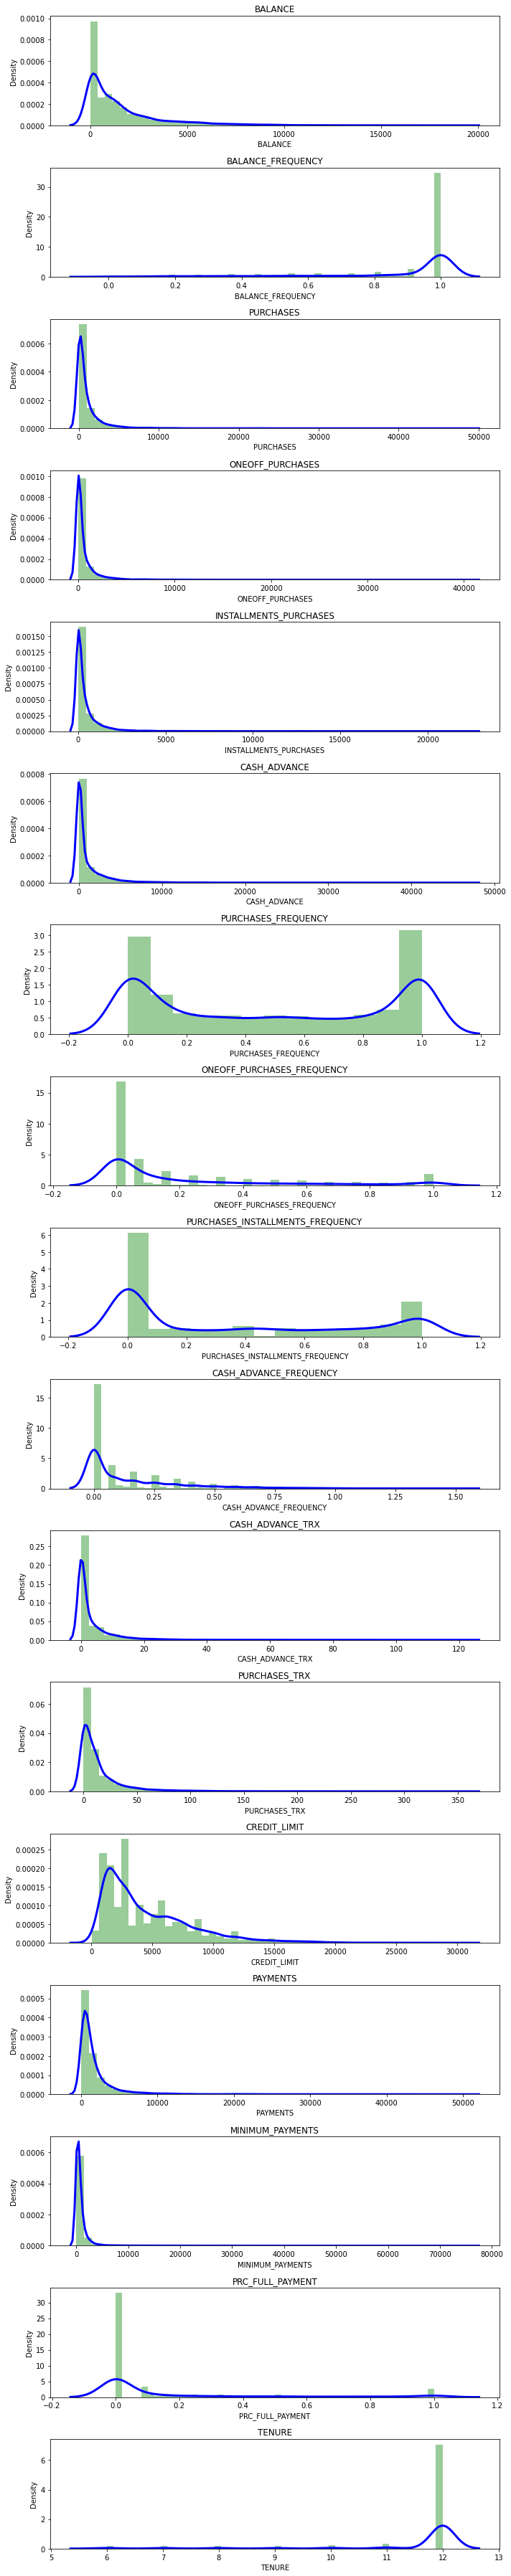

In [31]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(df.columns[i])

plt.tight_layout()

Observations from the plot:

- Mean of balance is $1500


- 'Balance_Frequency' for most customers is updated frequently ~1


- For 'PURCHASES_FREQUENCY', there are two distinct group of customers


- For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 


- Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0


- Credit limit average is around $4500


- Most customers are ~11 years tenure


In [32]:
cor = df.corr()

<AxesSubplot:>

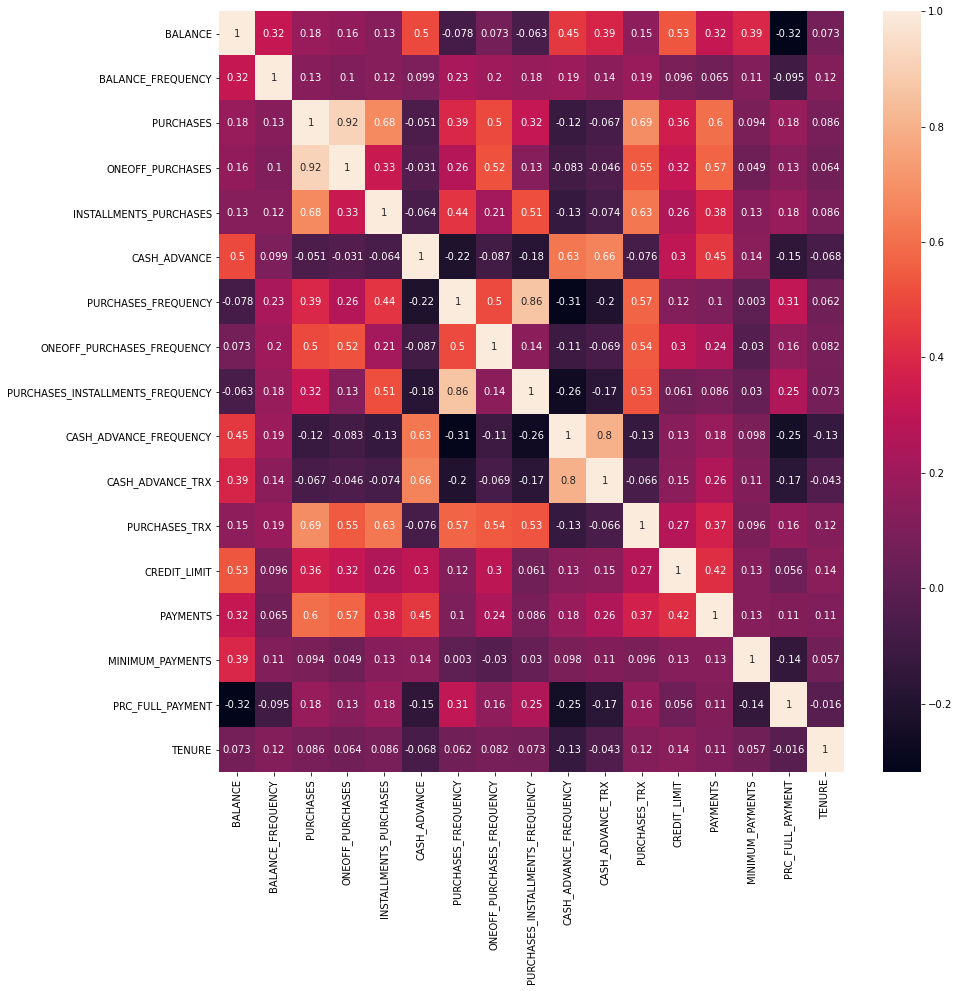

In [33]:
plt.figure(figsize=(14,14))
sns.heatmap(data=cor,annot=True)

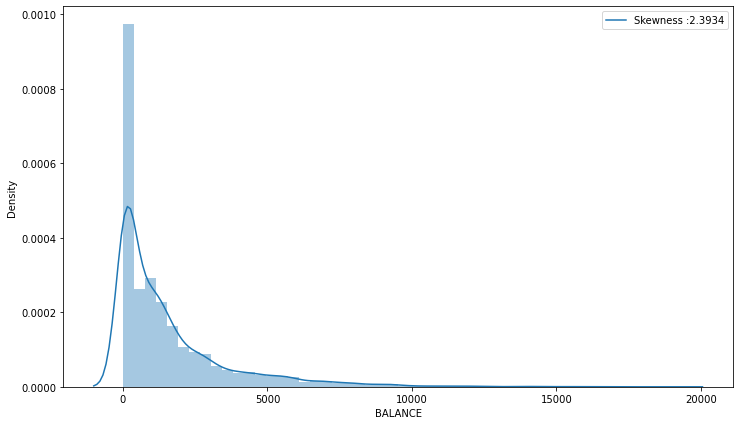

In [34]:
plt.figure(figsize=(12,7))
dist_target = sns.distplot(df["BALANCE"])
dist_target.legend(["Skewness :{:.4f}".format(df["BALANCE"].skew())])
plt.show()

Observations from the plot:

Mean account balance is about ~ 1564$

The mx balance for an individual is about 19043$

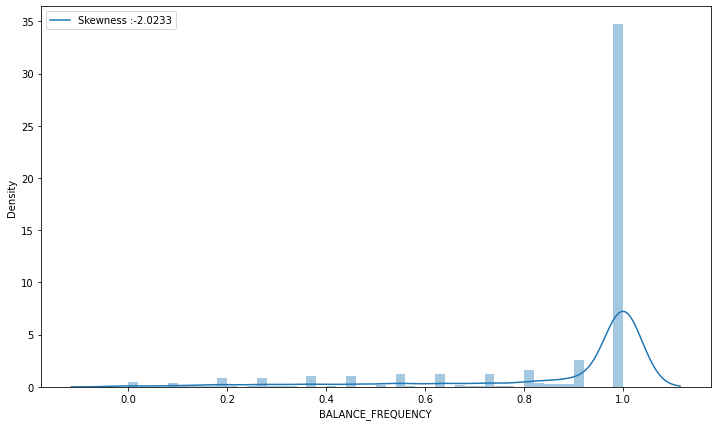

In [35]:
plt.figure(figsize=(12,7))
dist_target = sns.distplot(df["BALANCE_FREQUENCY"])
dist_target.legend(["Skewness :{:.4f}".format(df["BALANCE_FREQUENCY"].skew())])
plt.show()

Observations from the plot:
    
Balance is frequently updated for most of the customers   

In [36]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Finding the optimal number of clusters using elbow method

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scalar = StandardScaler()

In [39]:
df_scaled = scalar.fit_transform(df)

In [40]:
df_scaled.shape

(8950, 17)

In [41]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [42]:
from sklearn.cluster import KMeans

In [43]:
wcss = []

my_range = range(1,20)

for i in my_range:
    
    kmeans = KMeans(n_clusters=i)
    
    kmeans.fit(df_scaled)
    
    wcss.append(kmeans.inertia_)

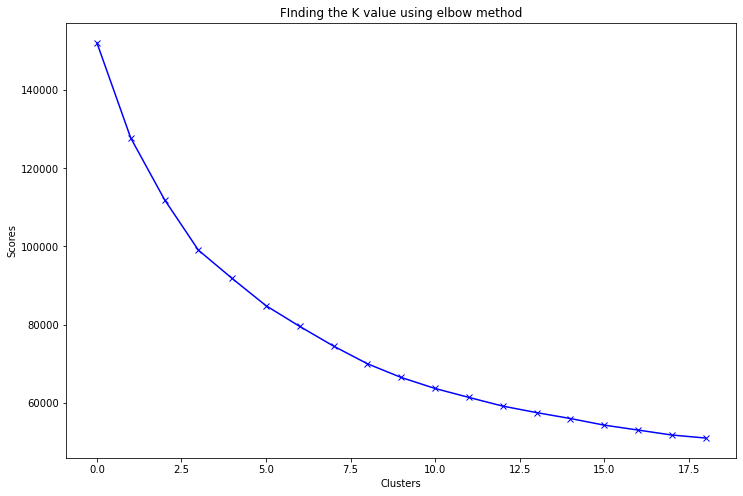

In [44]:
plt.figure(figsize=(12,8))
plt.plot(wcss, 'bx-')
plt.title("FInding the K value using elbow method")
plt.xlabel("Clusters")
plt.ylabel("Scores")
plt.show()

### Applying K means

In [45]:
kmeans = KMeans(n_clusters=8)

In [46]:
kmeans.fit(df_scaled)

KMeans()

In [47]:
labels = kmeans.labels_

In [48]:
labels

array([3, 0, 1, ..., 7, 7, 7])

In [49]:
# Cluster center shape
kmeans.cluster_centers_.shape

(8, 17)

In [50]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_,columns=[df.columns])

In [51]:
cluster_centers.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.660769,0.392720,-0.215701,-0.148401,-0.237444,2.008368,-0.469897,-0.177299,-0.428291,1.922546,1.935173,-0.264303,1.016810,0.819179,0.545811,-0.392558,0.069281
1,-0.153142,0.400415,0.048909,-0.041668,0.192114,-0.325007,0.937484,0.261751,0.843884,-0.393270,-0.315495,0.258380,-0.168092,-0.154628,0.011854,-0.334924,0.288743
2,-0.699904,-2.196569,-0.322229,-0.243216,-0.314938,-0.315261,-0.574217,-0.458378,-0.446938,-0.512890,-0.369854,-0.426070,-0.193322,-0.209045,-0.253923,0.119688,0.197657
3,0.012629,0.401476,-0.359938,-0.239756,-0.410468,-0.087143,-0.881787,-0.396844,-0.786381,0.117300,-0.021540,-0.490035,-0.302125,-0.247739,-0.013696,-0.451179,0.271716
4,0.805552,0.474779,2.136968,1.757390,1.824183,-0.193885,1.159150,1.732139,1.095758,-0.297353,-0.211093,2.551994,1.191162,1.189125,0.358182,0.224375,0.324160


In [52]:
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])

In [53]:
cluster_centers.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5021.224514,0.970303,542.356157,346.122520,196.349567,5190.512716,0.301758,0.149566,0.194224,0.519865,16.454960,8.140251,8194.018866,4104.587257,2136.196371,0.038898,11.610034
1,1245.722334,0.972125,1107.700240,523.276697,584.794017,297.316647,0.866608,0.280543,0.699818,0.056447,1.095808,21.132197,3882.861782,1285.511983,891.832596,0.055755,11.903731
2,107.684530,0.356924,314.757489,188.748985,126.272796,317.753603,0.259889,0.065715,0.186813,0.032510,0.724844,4.119323,3791.063619,1127.979360,272.450487,0.188721,11.781834
3,1590.761411,0.972377,234.191962,194.490940,39.886301,796.127721,0.136447,0.084071,0.051909,0.158617,3.101835,2.529390,3395.195308,1015.963432,832.288132,0.021753,11.880943
4,3241.162579,0.989741,5568.870639,3509.345094,2060.653365,572.285776,0.955574,0.719188,0.799919,0.075641,1.808271,78.142857,8828.383459,5175.545431,1698.935209,0.219340,11.951128


- First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%



- Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)



- Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits



- Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance

In [54]:
cluster_centers.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5021.224514,0.970303,542.356157,346.122520,196.349567,5190.512716,0.301758,0.149566,0.194224,0.519865,16.454960,8.140251,8194.018866,4104.587257,2136.196371,0.038898,11.610034
1,1245.722334,0.972125,1107.700240,523.276697,584.794017,297.316647,0.866608,0.280543,0.699818,0.056447,1.095808,21.132197,3882.861782,1285.511983,891.832596,0.055755,11.903731
2,107.684530,0.356924,314.757489,188.748985,126.272796,317.753603,0.259889,0.065715,0.186813,0.032510,0.724844,4.119323,3791.063619,1127.979360,272.450487,0.188721,11.781834
3,1590.761411,0.972377,234.191962,194.490940,39.886301,796.127721,0.136447,0.084071,0.051909,0.158617,3.101835,2.529390,3395.195308,1015.963432,832.288132,0.021753,11.880943
4,3241.162579,0.989741,5568.870639,3509.345094,2060.653365,572.285776,0.955574,0.719188,0.799919,0.075641,1.808271,78.142857,8828.383459,5175.545431,1698.935209,0.219340,11.951128


In [55]:
labels.shape

(8950,)

In [56]:
labels.max()

7

In [57]:
labels.min()

0

In [58]:
# Creating a new column name cluster in the orignal dataframe.

In [59]:
df.head(6)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [60]:
labels

array([3, 0, 1, ..., 7, 7, 7])

In [61]:
df_cluster = pd.concat([df,pd.DataFrame({"cluster":labels})],axis=1)

In [62]:
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [63]:
## Histogram of all these various clusters

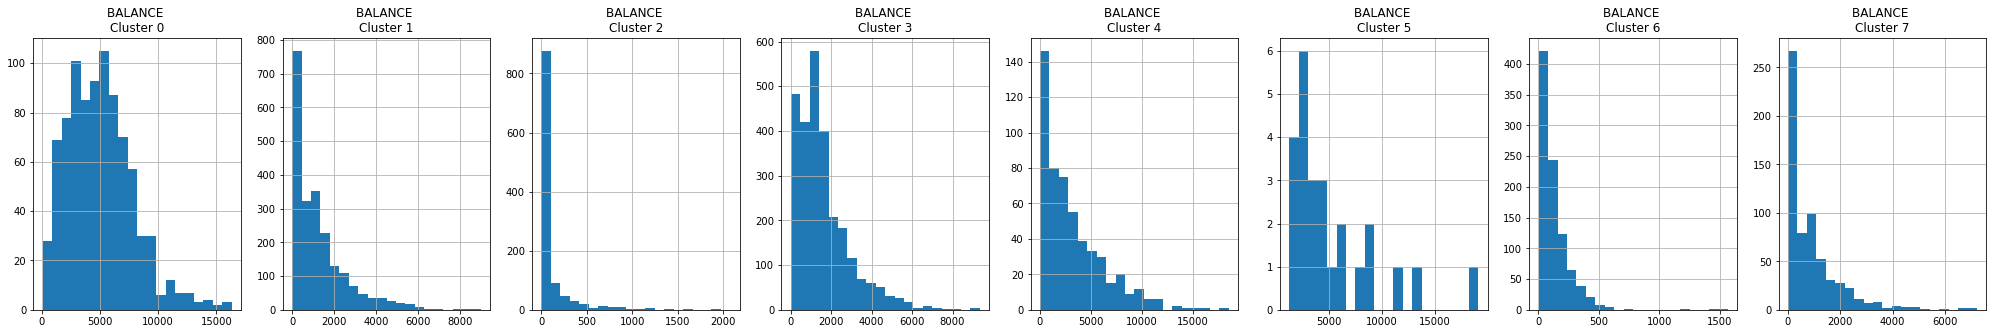

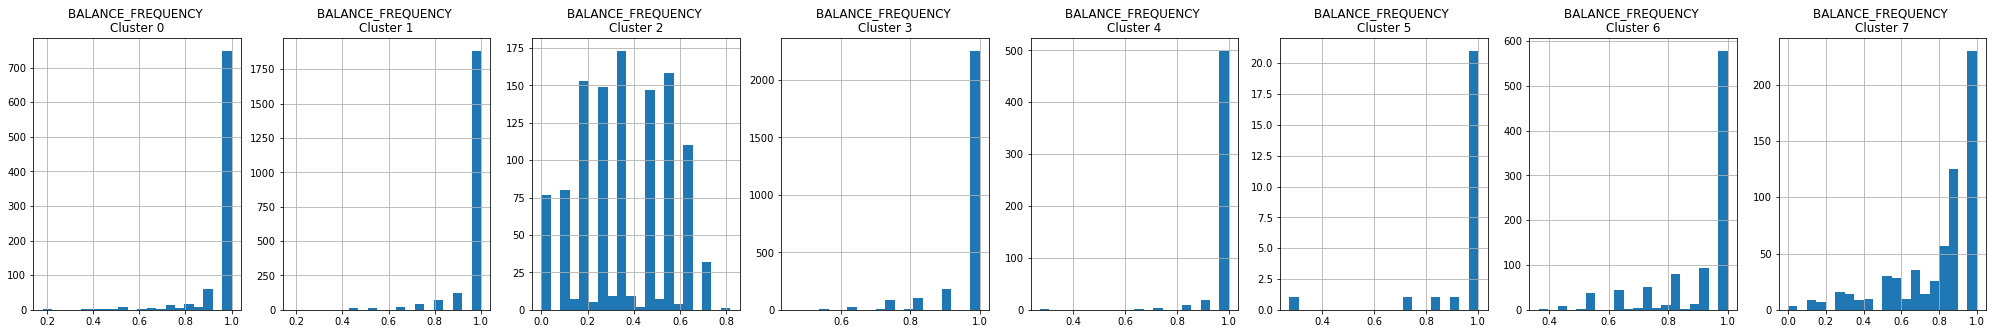

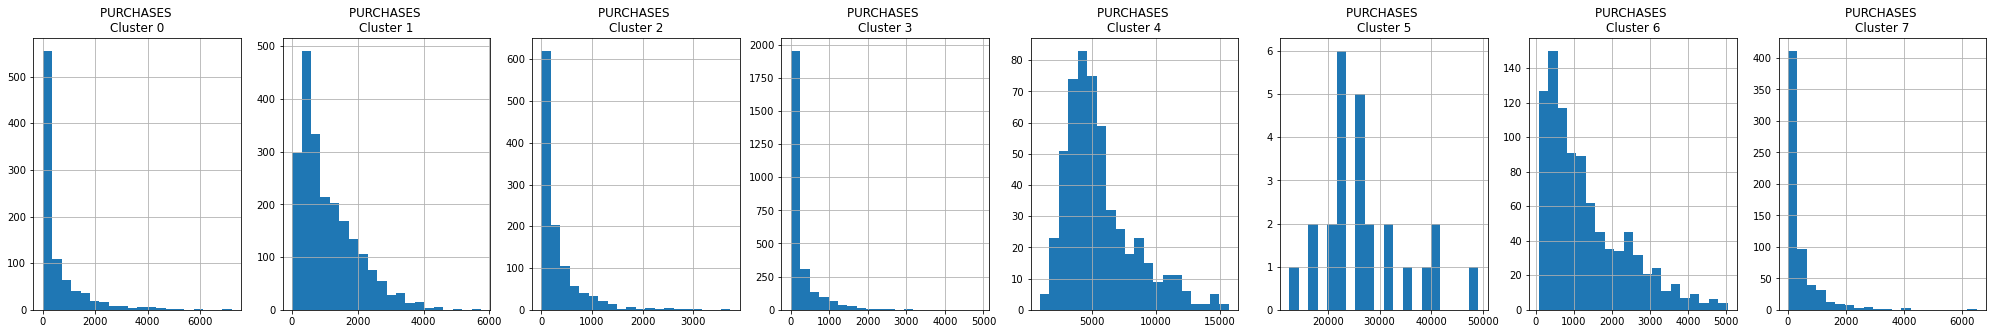

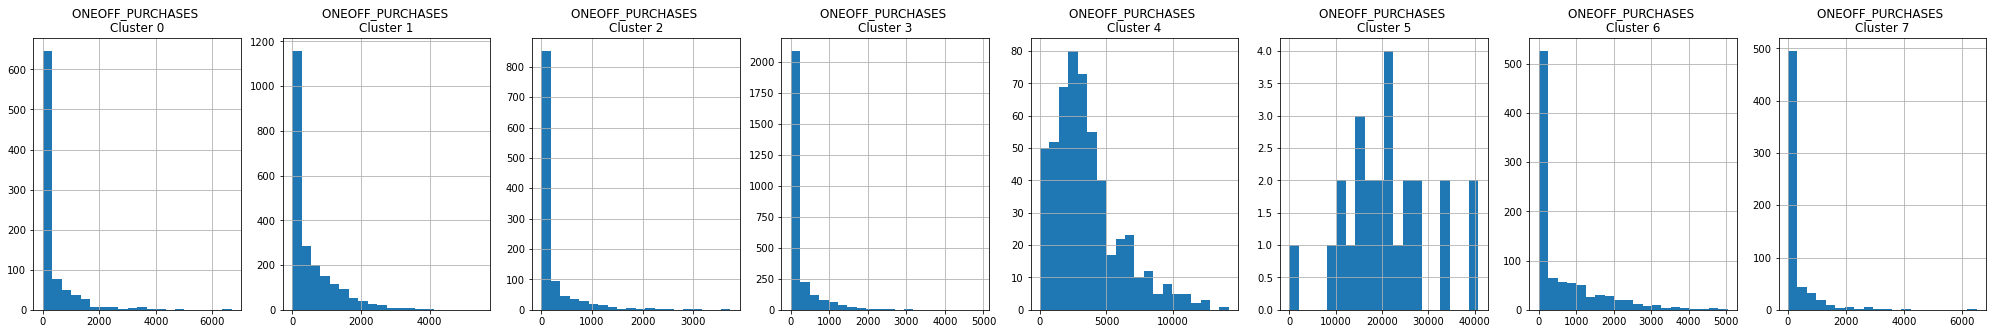

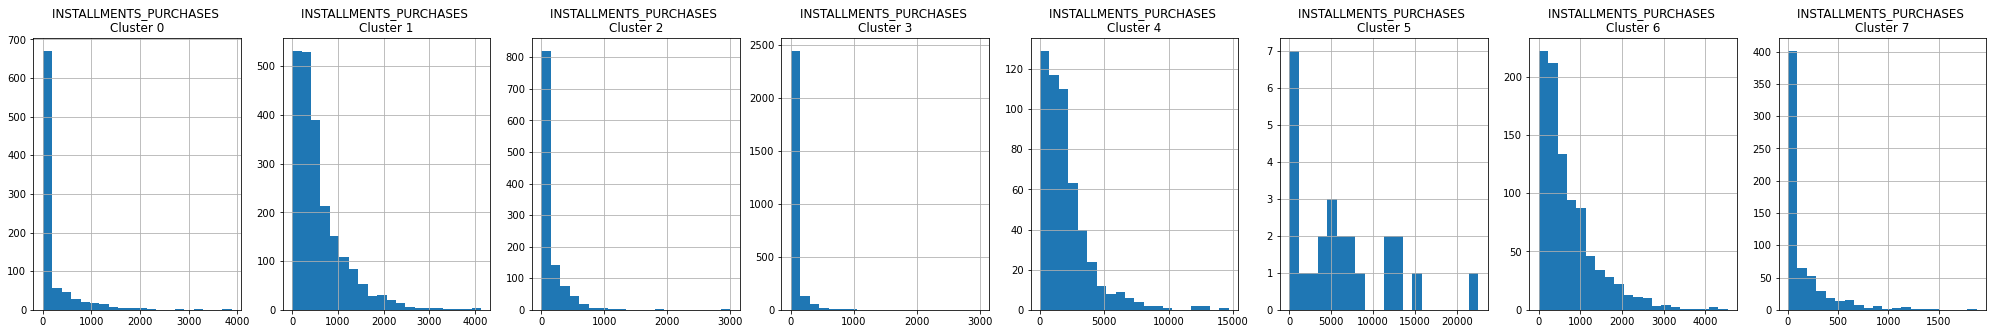

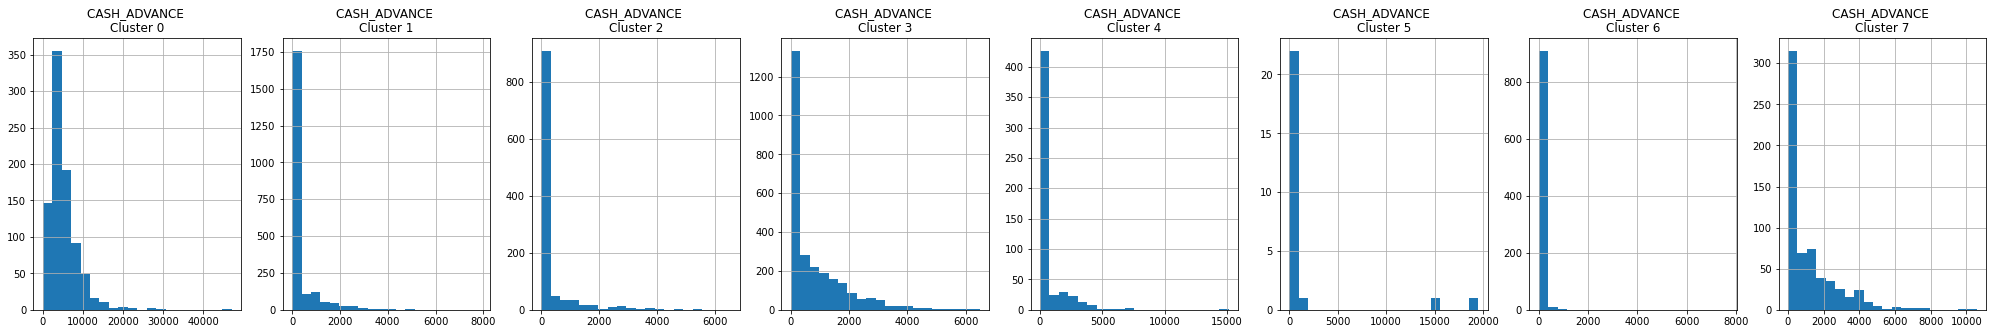

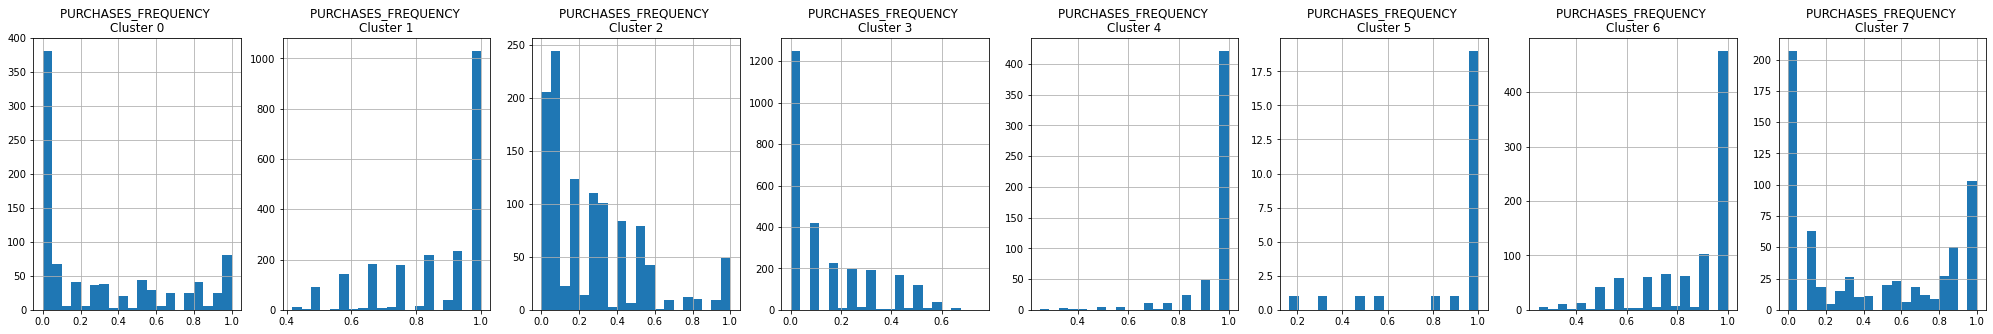

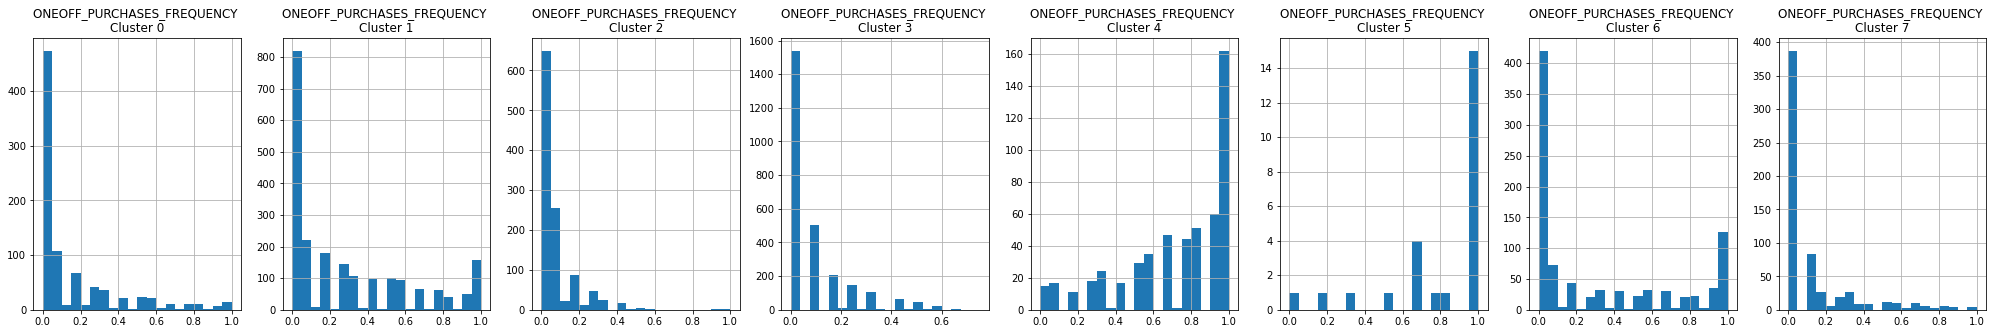

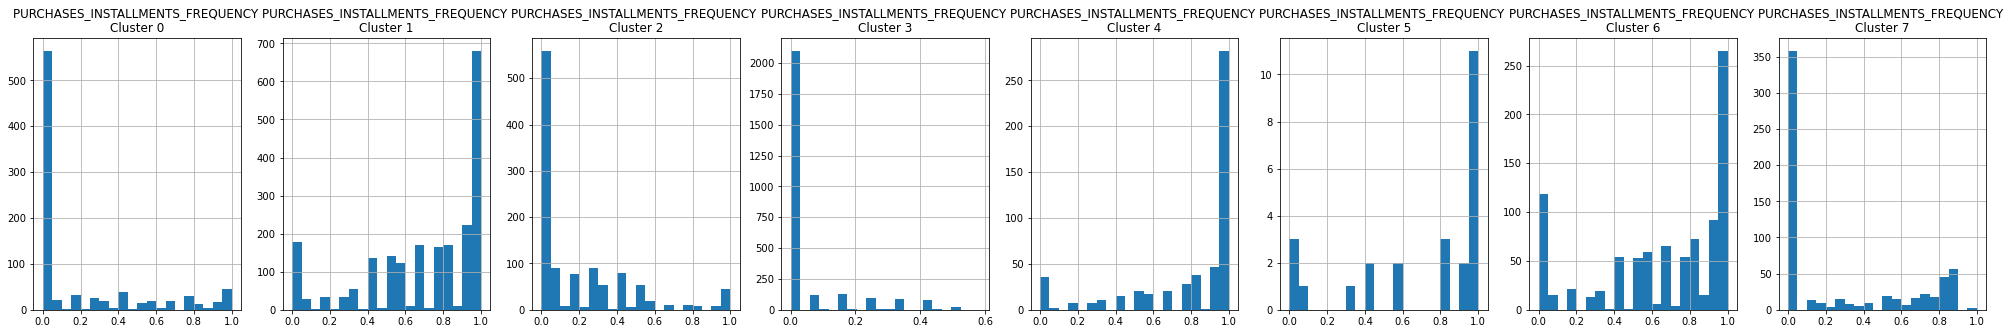

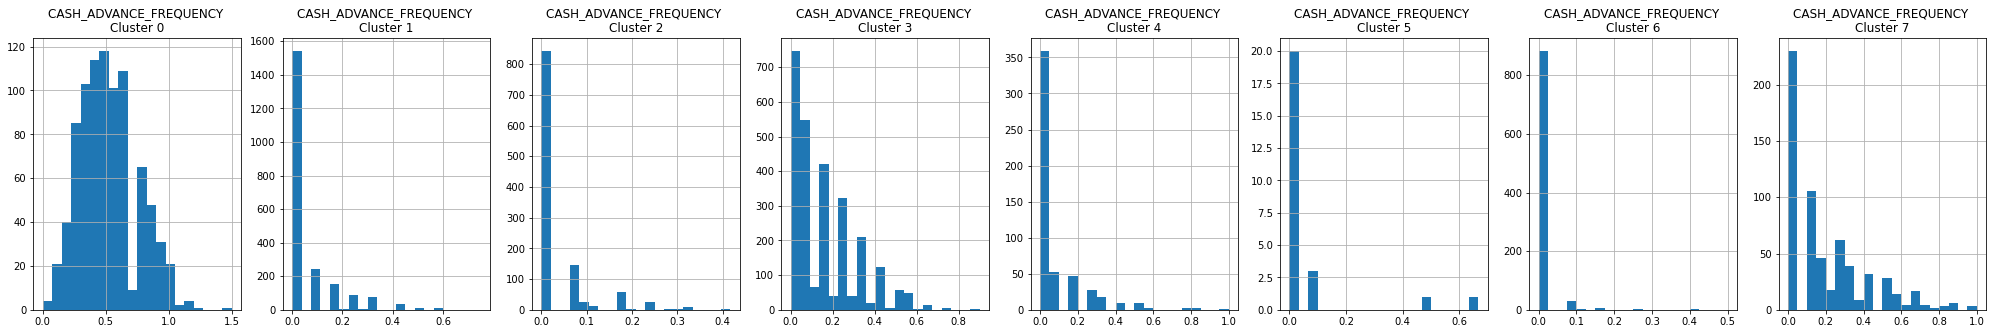

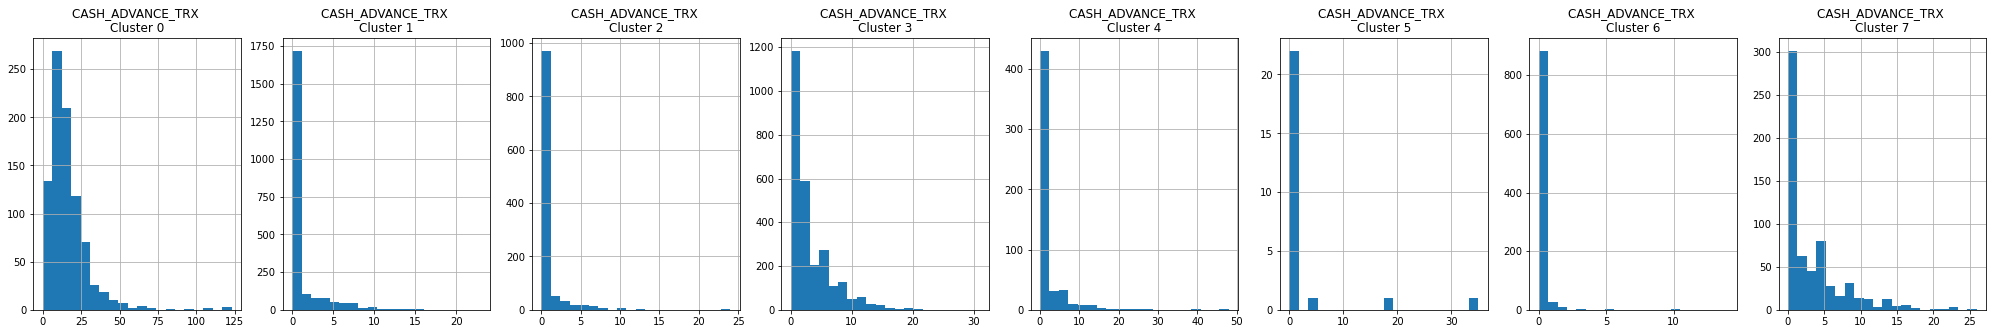

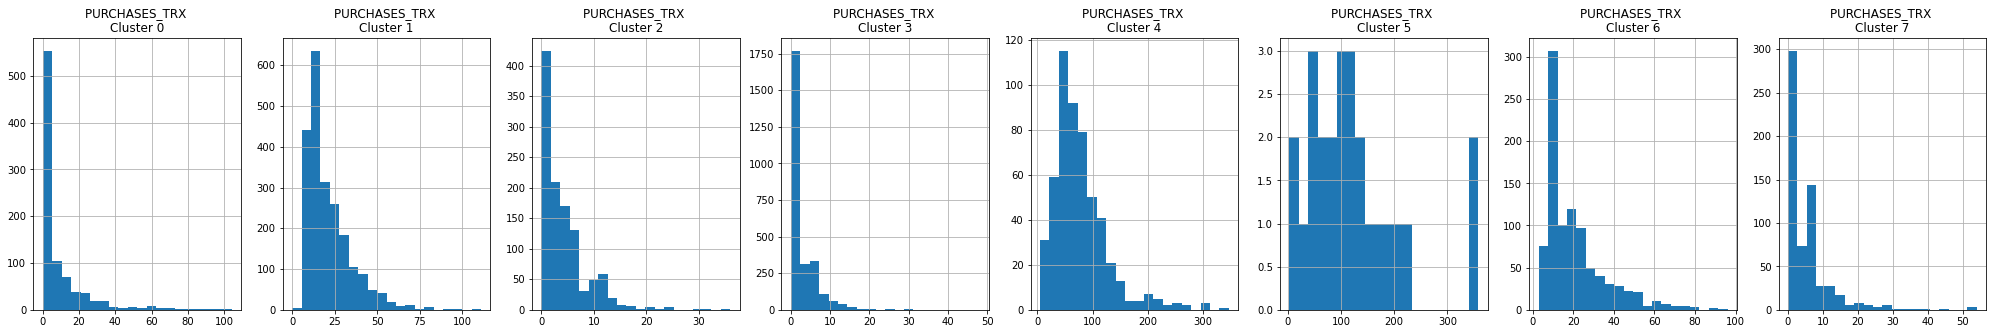

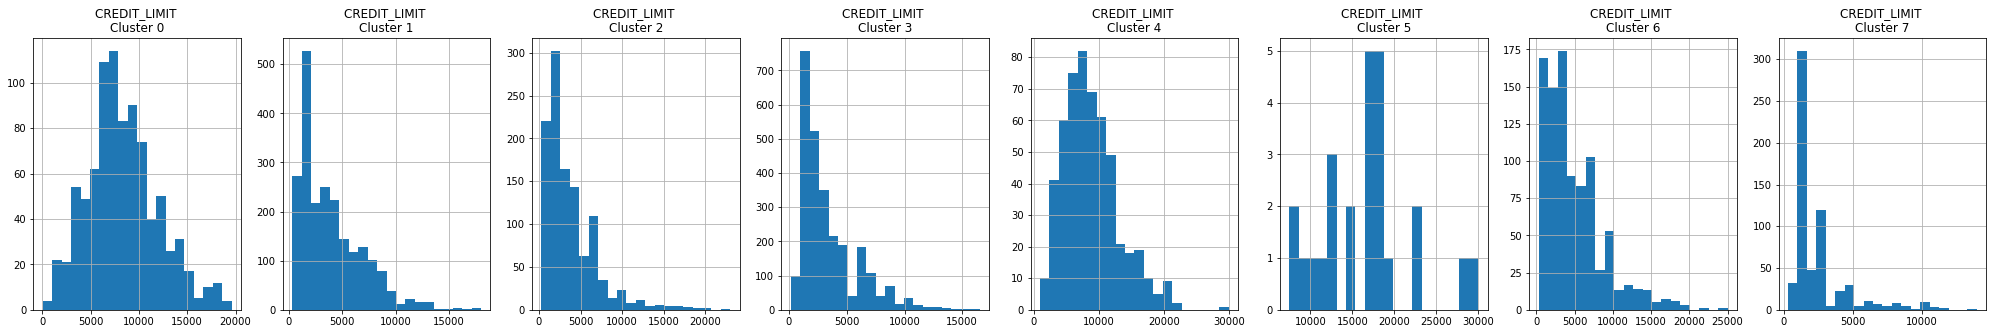

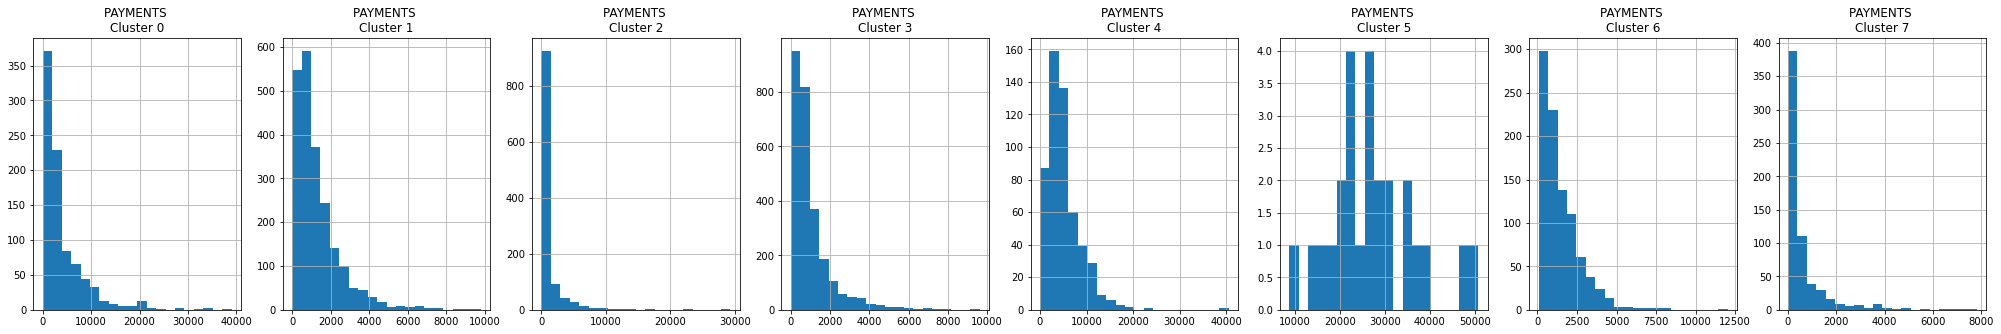

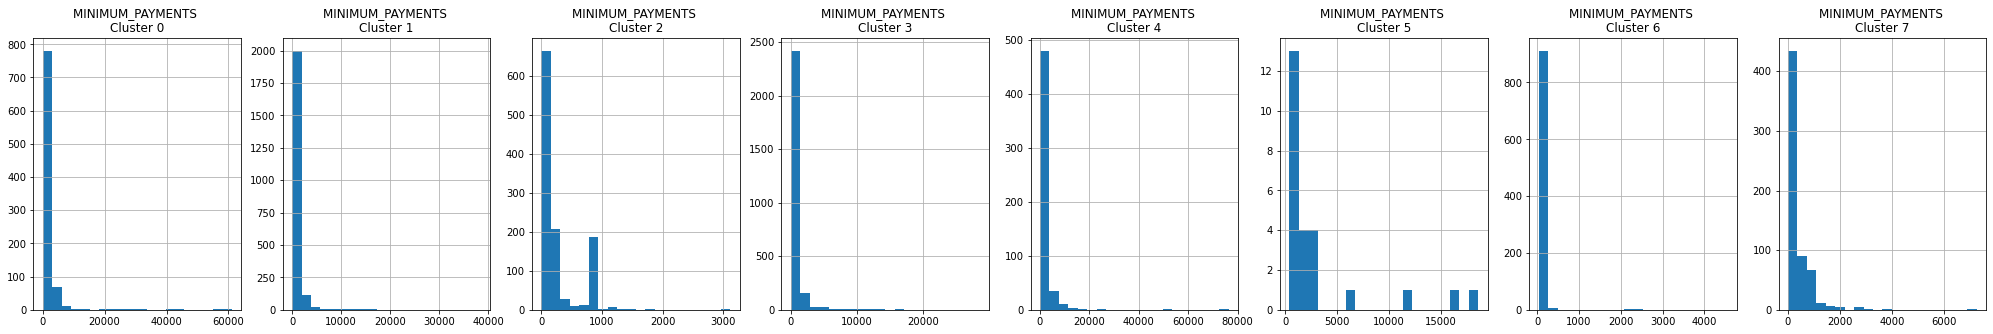

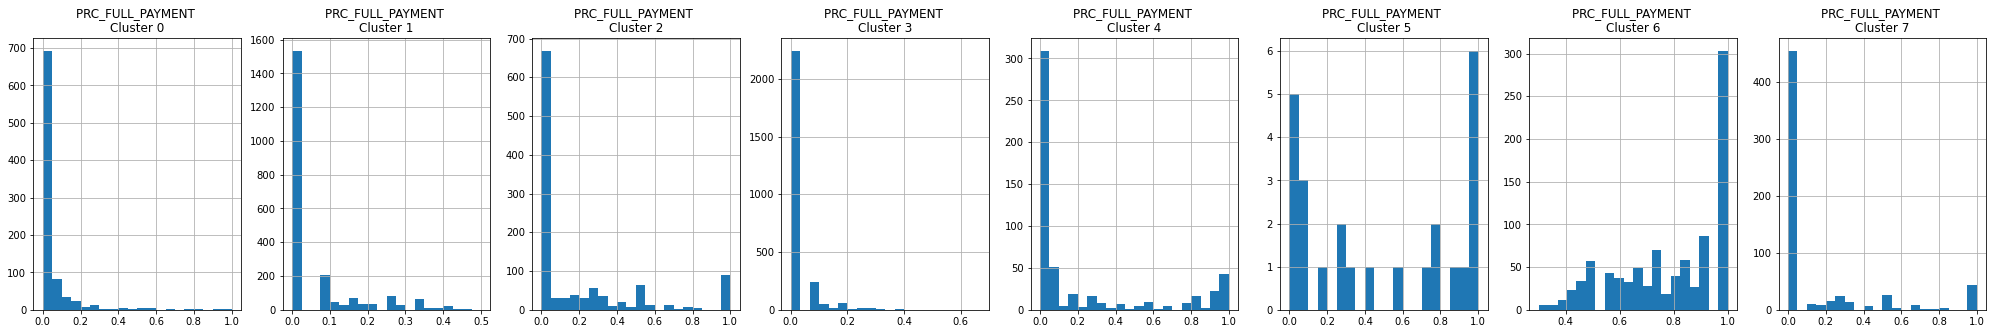

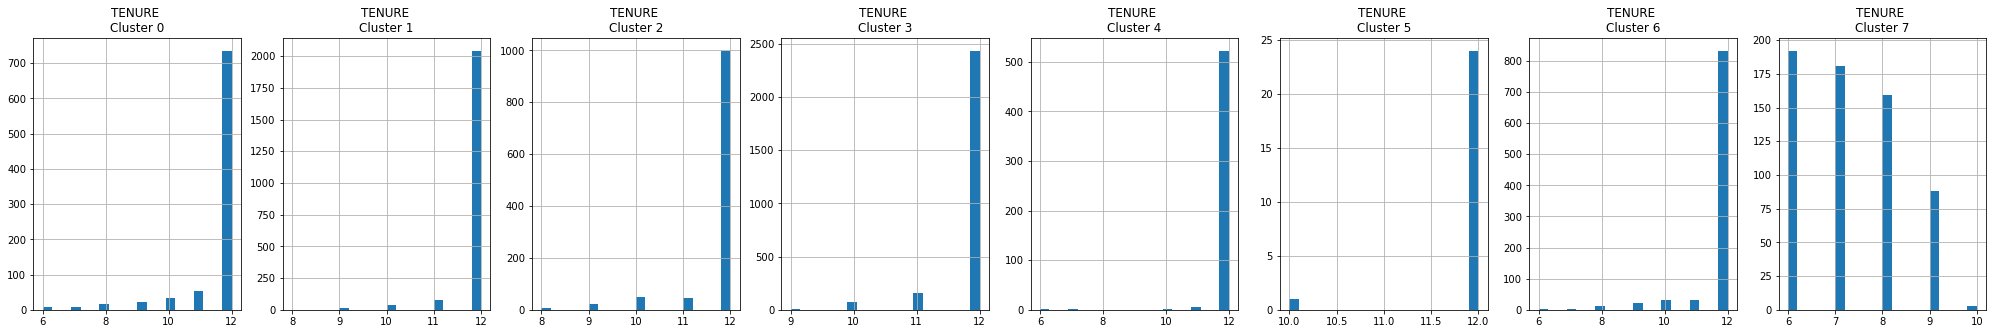

In [64]:
for i in df.columns:
    
    plt.figure(figsize=(35,5))
    
    for j in range(8):
        
        plt.subplot(1,8, j + 1)
        
        cluster = df_cluster[df_cluster["cluster"] == j]
        
        cluster[i].hist(bins = 20)
        
        plt.title("{} \nCluster {}".format(i,j))

### Using PCA

In [65]:
pca = PCA(n_components=2)

In [66]:
principal_component = pca.fit_transform(df_scaled)

In [67]:
print(principal_component)

[[-1.68220847 -1.07650713]
 [-1.1382512   2.50627812]
 [ 0.96971646 -0.38371523]
 ...
 [-0.92621157 -1.81074882]
 [-2.33653955 -0.6580505 ]
 [-0.5564027  -0.40060504]]


In [68]:
## Creating a  Dataframe

In [69]:
df_pca = pd.DataFrame(data=principal_component,columns=["Pca1","Pca2"])

In [70]:
df_pca.head()

,Pca1,Pca2
0,-1.682208,-1.076507
1,-1.138251,2.506278
2,0.969716,-0.383715
3,-0.873654,0.043343
4,-1.599415,-0.688687


In [71]:
df_pca = pd.concat([df_pca,pd.DataFrame({"clusters":labels})],axis=1)

In [72]:
df_pca.head()

,Pca1,Pca2,clusters
0,-1.682208,-1.076507,3
1,-1.138251,2.506278,0
2,0.969716,-0.383715,1
3,-0.873654,0.043343,3
4,-1.599415,-0.688687,3


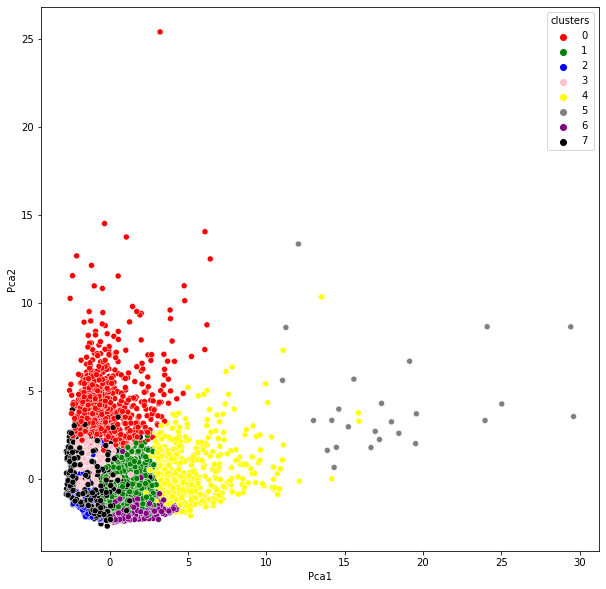

In [73]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(x="Pca1",y="Pca2",hue="clusters",data=df_pca,palette=['red','green','blue','pink','yellow','gray','purple','black'])


### AutoEncoders

In [74]:
## Applying auto encoders

In [76]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout

In [77]:
from tensorflow.keras.models import Model, load_model

In [78]:
from tensorflow.keras.initializers import glorot_uniform

In [80]:
from tensorflow.keras.optimizers import SGD

In [82]:
### Input
df_input = Input(shape=(17,))

In [83]:
## Building encoder and decoder networks

In [84]:
## Dense means fully connected artificial neural network
## Encoding demensions are 7 

x = Dense(7, activation="relu")(df_input)
x = Dense(500,activation="relu",kernel_initializer = 'glorot_uniform')(x)
x = Dense(500,activation="relu",kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000,activation="relu",kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10,activation="relu",kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000,activation="relu",kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500,activation="relu",kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

In [86]:
# Auto encoder
autoencoder = Model(df_input,decoded)

# Encoder

encoder = Model(df_input, encoded)

In [87]:
autoencoder.compile(optimizer="adam",loss="mean_squared_error")

In [88]:
df_scaled.shape

(8950, 17)

In [89]:
autoencoder.fit(df_scaled,df_scaled,batch_size=128,epochs=25,verbose=1)

Epoch 1/25
70/70 [==============================] - 3s 41ms/step - loss: 0.5137
Epoch 2/25
70/70 [==============================] - 2s 26ms/step - loss: 0.2743
Epoch 3/25
70/70 [==============================] - 3s 36ms/step - loss: 0.2156
Epoch 4/25
70/70 [==============================] - 2s 32ms/step - loss: 0.1816
Epoch 5/25
70/70 [==============================] - 3s 40ms/step - loss: 0.1653
Epoch 6/25
70/70 [==============================] - 3s 39ms/step - loss: 0.1460
Epoch 7/25
70/70 [==============================] - 2s 28ms/step - loss: 0.1322
Epoch 8/25
70/70 [==============================] - 3s 37ms/step - loss: 0.1203
Epoch 9/25
70/70 [==============================] - 3s 41ms/step - loss: 0.1128
Epoch 10/25
70/70 [==============================] - 3s 42ms/step - loss: 0.1042
Epoch 11/25
70/70 [==============================] - 4s 51ms/step - loss: 0.0975
Epoch 12/25
70/70 [==============================] - 3s 47ms/step - loss: 0.0859
Epoch 13/25
70/70 [==================

In [91]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)             

In [93]:
pred = encoder.predict(df_scaled)

In [94]:
pred

array([[0.05936186, 0.        , 0.62793654, ..., 0.1066855 , 0.        ,
        0.0130087 ],
       [2.7021422 , 0.        , 1.8823249 , ..., 1.0393167 , 0.        ,
        0.        ],
       [1.6539173 , 0.        , 0.8855125 , ..., 1.5905274 , 0.        ,
        2.2816272 ],
       ...,
       [0.15044907, 0.        , 0.67350394, ..., 0.65015143, 0.        ,
        0.        ],
       [0.44165924, 0.        , 0.25609884, ..., 0.4467886 , 0.        ,
        0.06585461],
       [0.93071795, 0.        , 0.        , ..., 0.19456705, 0.        ,
        1.4839554 ]], dtype=float32)

In [95]:
pred.shape

(8950, 10)

In [96]:
pred

array([[0.05936186, 0.        , 0.62793654, ..., 0.1066855 , 0.        ,
        0.0130087 ],
       [2.7021422 , 0.        , 1.8823249 , ..., 1.0393167 , 0.        ,
        0.        ],
       [1.6539173 , 0.        , 0.8855125 , ..., 1.5905274 , 0.        ,
        2.2816272 ],
       ...,
       [0.15044907, 0.        , 0.67350394, ..., 0.65015143, 0.        ,
        0.        ],
       [0.44165924, 0.        , 0.25609884, ..., 0.4467886 , 0.        ,
        0.06585461],
       [0.93071795, 0.        , 0.        , ..., 0.19456705, 0.        ,
        1.4839554 ]], dtype=float32)

In [98]:
wcss_AE = []

my_range = range(1,20)

for i in my_range:
    
    kmeans = KMeans(n_clusters=i)
    
    kmeans.fit(pred)
    
    wcss_AE.append(kmeans.inertia_)

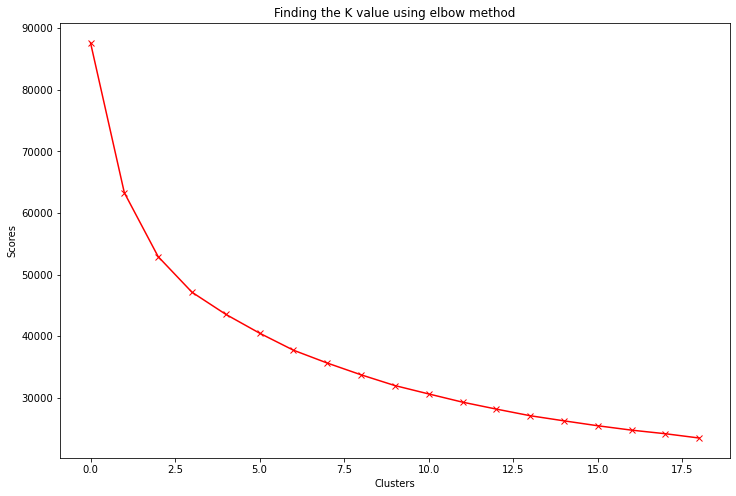

In [99]:
plt.figure(figsize=(12,8))
plt.plot(wcss_AE, 'rx-')
plt.title("Finding the K value using elbow method")
plt.xlabel("Clusters")
plt.ylabel("Scores")
plt.show()

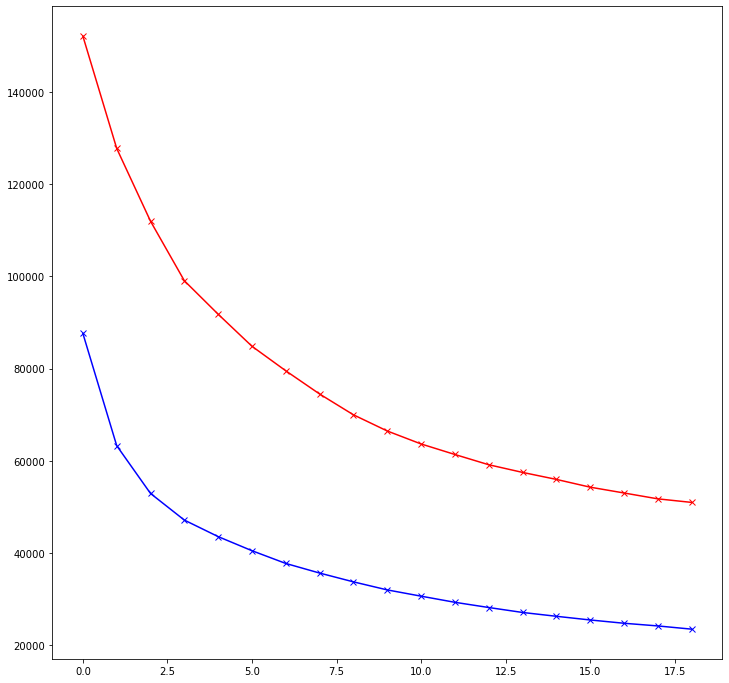

In [101]:
plt.figure(figsize=(12,12))
plt.plot(wcss,"-bx",color="r")
plt.plot(wcss_AE,"-bx",color="b")

In [102]:
kmeans = KMeans(n_clusters=4)

In [103]:
kmeans.fit(pred)

KMeans(n_clusters=4)

In [104]:
labels = kmeans.labels_

In [105]:
labels

array([1, 0, 3, ..., 1, 1, 1])

In [106]:
df_cluster_f = pd.concat([df,pd.DataFrame({"Clusters":labels})],axis=1)

In [107]:
df_cluster_f.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [108]:
pca = PCA(n_components=2)

In [109]:
princ_comp = pca.fit_transform(pred)

In [110]:
df_pca_2 = pd.DataFrame(data=princ_comp,columns=["PCA1","PCA2"])

In [111]:
df_pca_2.head()

,PCA1,PCA2
0,-2.069438,-0.111410
1,1.504236,-1.778823
2,0.976015,0.675617
3,0.009924,-0.172383
4,-1.722532,-0.102898


In [112]:
df_pca_2 = pd.concat([df_pca_2,pd.DataFrame({"cluster":labels})],axis=1)

In [113]:
df_pca_2.head()

,PCA1,PCA2,cluster
0,-2.069438,-0.111410,1
1,1.504236,-1.778823,0
2,0.976015,0.675617,3
3,0.009924,-0.172383,1
4,-1.722532,-0.102898,1


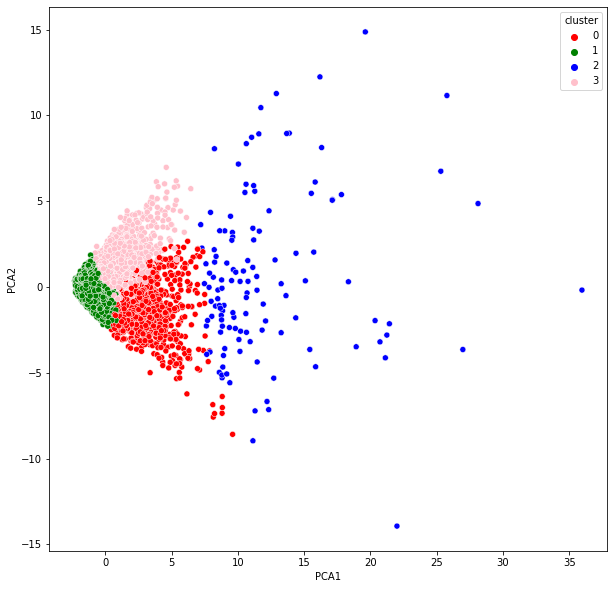

In [114]:
plt.figure(figsize=(10,10))

ax1 = sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=df_pca_2,palette=['red','green','blue','pink'])
